In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from utils import *

In [3]:
df_train = load('data/opera_train.data')
df_test= load('data/opera_test.data')

label = pd.read_csv('data/opera_train.solution', sep=' ', header=None)
label.columns = ['brick_id', 'shower_id']
del label['brick_id']# = label['brick_id'].astype('float')
df_train = pd.concat([df_train, label], axis=1)

In [5]:
df_train.shape

(3000038, 6)

In [43]:
df_train[:5]

,brick_id,SX,SY,SZ,TX,TY,shower_id,a0,sin_a0,cos_a0,rt
0,0.0,-10177.71,-8697.63,-24330.69,-0.1505,0.1620,0,-2.277941,-0.760220,-0.649666,14393.455516
1,0.0,-10375.19,-8490.78,-23056.31,-0.1585,0.1673,0,-2.256641,-0.773885,-0.633327,14672.734410
2,0.0,-10591.61,-8268.13,-21785.49,-0.1913,0.1805,0,-2.233614,-0.788261,-0.615341,14978.798509
3,0.0,-10827.50,-8042.95,-20510.45,-0.1643,0.2017,0,-2.209690,-0.802756,-0.596308,15312.397347
4,0.0,-11053.21,-7800.50,-19239.20,-0.2127,0.1621,0,-2.185353,-0.817029,-0.576596,15631.599490


In [4]:
df_train['a0'] = np.arctan2(df_train['SX'].values.copy(), df_train['SY'].values.copy())

df_train['sin_a0'] = np.sin(df_train['a0'].values)
df_train['cos_a0'] = np.cos(df_train['a0'].values) 
df_train['rt'] = np.sqrt(df_train['SX'].values.copy() ** 2 + df_train['SX'].values.copy() ** 2)

In [ ]:
# df_train['sin_a0'] = np.sin(df_train['a0'].values)
# df_train['cos_a0'] = np.cos(df_train['a0'].values) 

In [ ]:
np.arctan2(hits['y'].values, hits['x'].values)

(array([146549.,  70899.,  52373.,  46234.,  39932.,  36722.,  35805.,
         33292.,  31368.,  29351.,  28006.,  28508.,  29050.,  29762.,
         28625.,  26719.,  25306.,  24565.,  22800.,  22067.,  20938.,
         20299.,  19279.,  18697.,  18656.,  19265.,  19271.,  18714.,
         17325.,  15409.,  14715.,  13680.,  13391.,  13427.,  12802.,
         12062.,  11903.,  11780.,  11110.,  10832.,  10711.,  10512.,
         10300.,   9649.,   9258.,   9188.,   9021.,   9055.,   8915.,
          8621.,   8124.,   7739.,   7662.,   7773.,   7530.,   7330.,
          7427.,   7755.,   7882.,   7519.,   7299.,   7047.,   6946.,
          6698.,   6563.,   6671.,   6543.,   6492.,   6311.,   6155.,
          6277.,   6254.,   6222.,   6042.,   5885.,   5887.,   5961.,
          5778.,   5567.,   5459.,   5747.,   5809.,   5748.,   5505.,
          5532.,   5514.,   5226.,   5115.,   5036.,   5207.,   5262.,
          5118.,   5076.,   4936.,   5007.,   5204.,   5053.,   5371.,
      

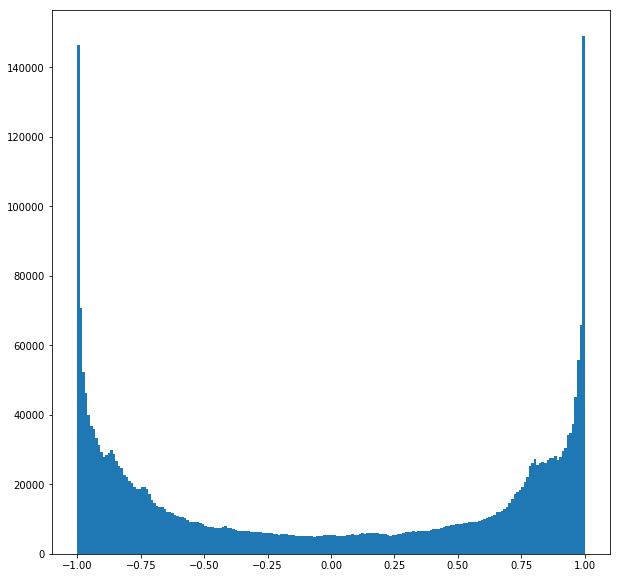

In [10]:
plt.figure(figsize=(10,10))
plt.hist(df_train['cos_a0'], bins=200)

In [44]:
gt = np.array([[0,1], [0, 2]])
p = np.array([[0,2], [0, 2]])
scorer(df_train[['brick_id', 'shower_id']].values, df_train[['brick_id', 'shower_id']].values)

1.0

In [29]:
df_train[:5]

,brick_id,SX,SY,SZ,TX,TY,shower_id,a0,sin_a0,cos_a0
0,0.0,-10177.71,-8697.63,-24330.69,-0.1505,0.1620,0,-2.277941,-0.760220,-0.649666
1,0.0,-10375.19,-8490.78,-23056.31,-0.1585,0.1673,0,-2.256641,-0.773885,-0.633327
2,0.0,-10591.61,-8268.13,-21785.49,-0.1913,0.1805,0,-2.233614,-0.788261,-0.615341
3,0.0,-10827.50,-8042.95,-20510.45,-0.1643,0.2017,0,-2.209690,-0.802756,-0.596308
4,0.0,-11053.21,-7800.50,-19239.20,-0.2127,0.1621,0,-2.185353,-0.817029,-0.576596


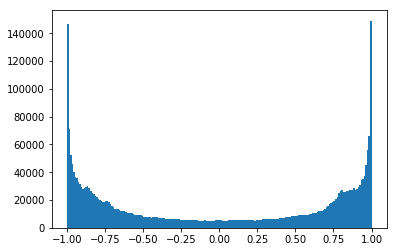

In [24]:
plt.hist(df_train['cos_a0'], bins=200)
plt.show()

In [48]:
predicted_labels = []

for name, group in df_train.groupby('brick_id'):
    dbscan = DBSCAN()
    pred = dbscan.fit_predict(group[['SX', 'SY', 'SZ', 'sin_a0', 'cos_a0', 'rt']].values /\
                              np.array([1e3, 1e3, 1e4,1000.7,1000.7, 1e4]))
    predicted_labels.append(pred)
    
preds = np.vstack([df_train.brick_id.values, np.concatenate(predicted_labels)]).T

In [49]:
scorer(labels_true=df_train[['brick_id', 'shower_id']].values, labels_pred=preds)

0.588259007933111

In [ ]:
0.5894914589213301
0.46950395388879346
0.2888829597959963

In [49]:
predicted_labels = []

for name, group in df_test.groupby('brick_id'):
    dbscan = DBSCAN()
    pred = dbscan.fit_predict(group[['SX', 'SY', 'SZ']].values / np.array([1e3, 1e3, 1e4]))
    predicted_labels.append(pred)
np.savetxt('opera_test.predict', np.vstack([df_test.brick_id.values, np.concatenate(predicted_labels)]).T.astype(int), fmt='%i')

In [37]:
df_val= load('data/opera_valid.data')

In [50]:
predicted_labels = []

for name, group in df_val.groupby('brick_id'):
    dbscan = DBSCAN()
    pred = dbscan.fit_predict(group[['SX', 'SY', 'SZ']].values / np.array([1e3, 1e3, 1e4]))
    predicted_labels.append(pred)
np.savetxt('opera_valid.predict', np.vstack([df_val.brick_id.values, np.concatenate(predicted_labels)]).T.astype(int), fmt='%i')